<font size="5">Project 2 House Prices (Regression) </font>


#### Import

In [1]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

<font size="4">Data Import and Cleaning </font>


In [2]:
# pip install pandas-profiling # desc = ('data_description.txt', sep='|', )

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
house_train = pd.read_csv('train.csv', sep=',')

In [5]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
house_train.shape

(1460, 81)

In [8]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
house_train.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

##### We drop the below features because we found the majority of their classes belong to one class (will be useless and unbalanced) 


In [10]:
# We drop the below features because we found the majority of their classes belong to one class (will be useless and unbalanced) 
house_train =house_train.drop(columns=['Id','Alley', 'MSZoning', 'Street', 'LandContour', 'Utilities', 
                                       'LandSlope', 'Condition1', 'Condition2','3SsnPorch', 'Fence', 'SaleCondition',
                                       'PoolQC','MiscVal', 'ScreenPorch', 'PoolArea', 'MiscFeature','GarageCond',
                                       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
                                       'Functional', 'RoofMatl', 'BsmtCond', 'BsmtFinSF2', 'Heating', 'RoofStyle'])

In [11]:
#iddd

In [12]:
house_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SalePrice
0,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,150,856,Ex,Y,856,1710,1,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,2,2008,WD,208500
1,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,284,1262,Ex,Y,1262,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,5,2007,WD,181500
2,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,434,920,Ex,Y,920,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,9,2008,WD,223500
3,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,540,756,Gd,Y,961,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,2,2006,WD,140000
4,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,490,1145,Ex,Y,1145,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,12,2008,WD,250000


In [13]:
house_train.shape

(1460, 52)

In [14]:
house_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
MoSold           0.046432
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

In [15]:
house_train.dtypes #check data type 

MSSubClass         int64
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
CentralAir        object
1stFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


<font size="4" color="blue"> Fill the null values & outlier & changinig data type </font>

In [16]:
#convert float into int and fill the null with zero 
house_train['GarageYrBlt'].fillna(0,inplace=True)
house_train['GarageType'].fillna("No Garage", inplace = True)
house_train['FireplaceQu'].fillna("No Fireplace", inplace = True)  

In [17]:
#convert to object 
house_train.MSSubClass = house_train.MSSubClass.astype(object)
house_train['GarageYrBlt'].astype(int)

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: int64

In [18]:
#house_train['GarageQual'].isnull().sum()

In [19]:
#house_train['GarageQual']=house_train['GarageQual'].fillna(house_train['GarageQual'].mode()[0])

In [20]:
house_train['GarageType'].unique() #null here = no garage 

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

In [21]:
house_train['FireplaceQu'].unique()#null here = No Fireplace

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

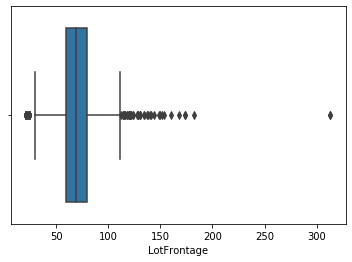

In [22]:
sns.boxplot(house_train.LotFrontage);

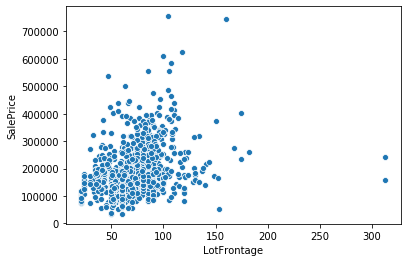

In [23]:
sns.scatterplot(house_train.LotFrontage, house_train.SalePrice);

In [24]:
# We drop the outliers which over 300 to replace the nulls with mean
house_train.drop(house_train[house_train['LotFrontage'] > 300].index, axis=0, inplace=True)

In [25]:
# We fill the missing values of LotFrontage by the mean after we remove the outliers
house_train.LotFrontage.fillna(np.mean(house_train.LotFrontage), inplace=True)

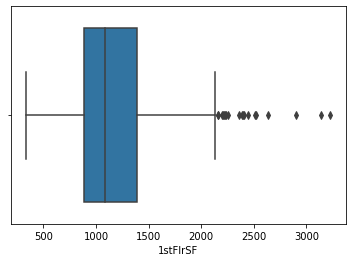

In [26]:
sns.boxplot(house_train['1stFlrSF']);

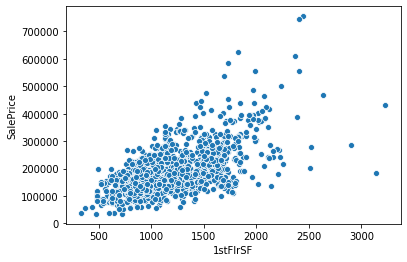

In [27]:
sns.scatterplot(x = house_train['1stFlrSF'], y = house_train.SalePrice); #outlier only one in row 

In [28]:
house_train['1stFlrSF'].drop(house_train[house_train['1stFlrSF']>4000].index, axis=0 , inplace=True)

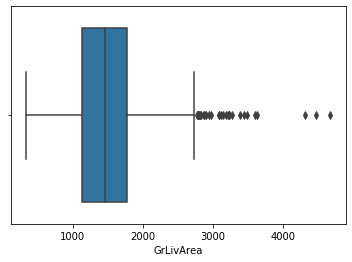

In [29]:
sns.boxplot(house_train['GrLivArea']); #outlier only in 4 row

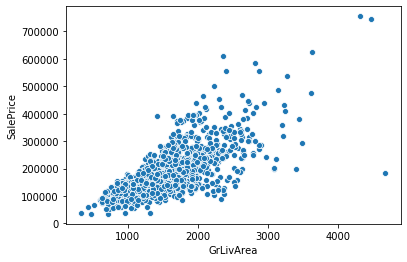

In [30]:
sns.scatterplot(x = house_train.GrLivArea, y = house_train.SalePrice);

In [31]:
house_train['GrLivArea'].drop(house_train[house_train['GrLivArea']>4000].index, axis=0 , inplace=True)

<font size="4">correlation </font>


In [32]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    ax.title.set_text('Features Correlation')
    b,t=plt.ylim()
    b  +=.5
    t -=.5
    plt.ylim(b,t)


    plt.show()

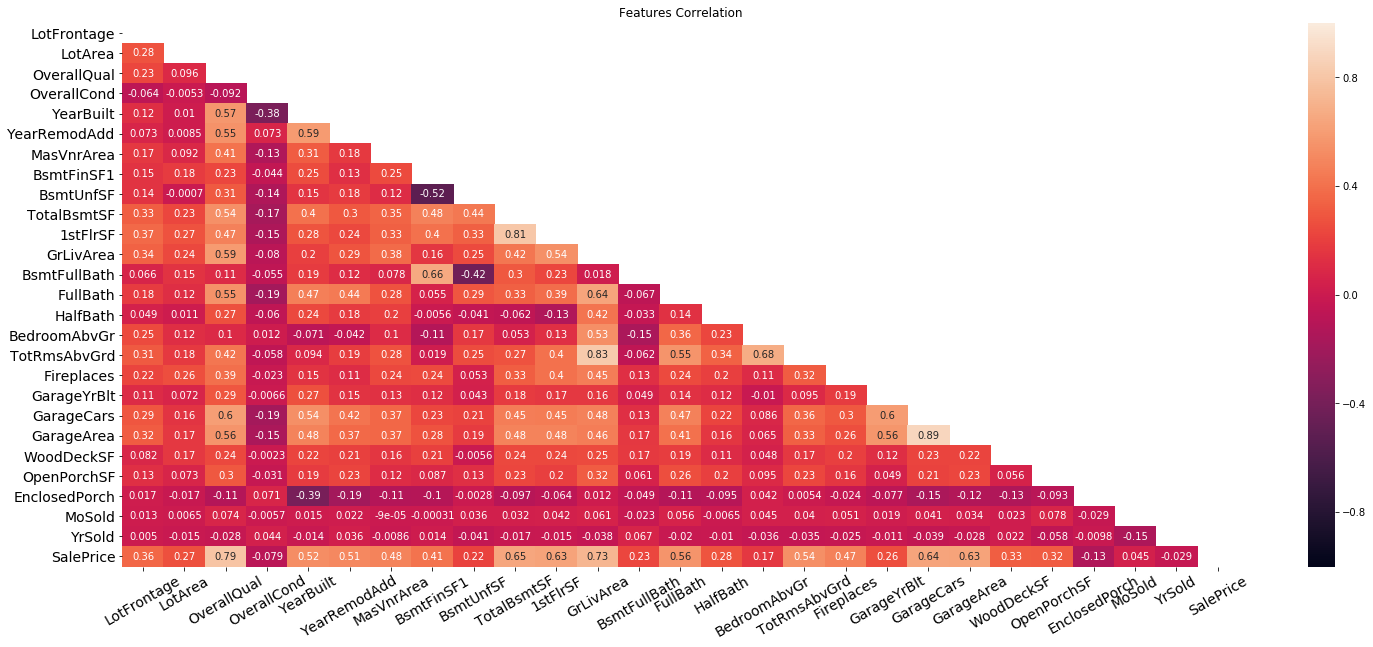

In [33]:
correlation_heat_map(house_train)

In [34]:
house_train.isna().sum().sort_values(ascending=False)

GarageQual       81
GarageFinish     81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Exterior1st       0
BsmtFinSF1        0
Foundation        0
ExterCond         0
ExterQual         0
Exterior2nd       0
SalePrice         0
YearRemodAdd      0
BsmtUnfSF         0
OverallCond       0
OverallQual       0
HouseStyle        0
BldgType          0
Neighborhood      0
LotConfig         0
LotShape          0
LotArea           0
LotFrontage       0
YearBuilt         0
TotalBsmtSF       0
SaleType          0
HeatingQC         0
YrSold            0
MoSold            0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageArea        0
GarageCars        0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
Fireplaces        0
TotRmsAbvGrd      0
KitchenQual       0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtFullBath      0
GrLivArea         0
1stFlrSF          0


<font size="4">Visualize the data</font>

In [35]:
#plt.subplots(figsize=(12,9))
#sns.distplot(house_train['SalePrice']);

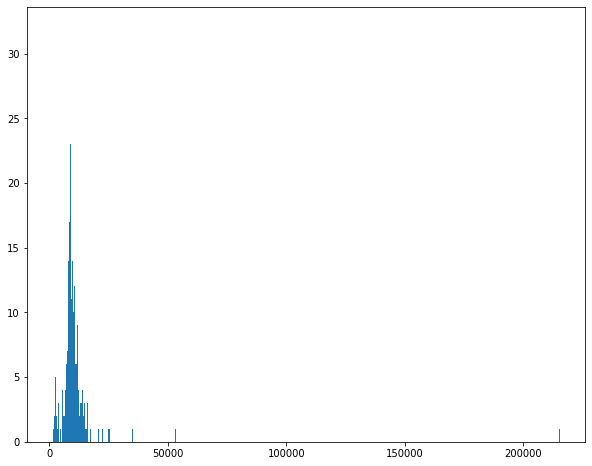

In [36]:
plt.figure(figsize=(10, 8))
plt.hist(house_train.LotArea, bins=3000);

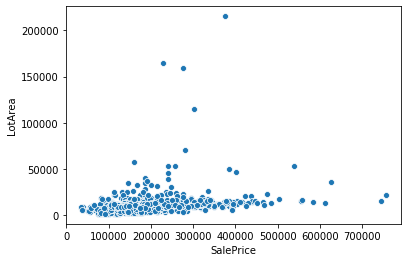

In [37]:
sns.scatterplot(house_train.SalePrice, house_train.LotArea)

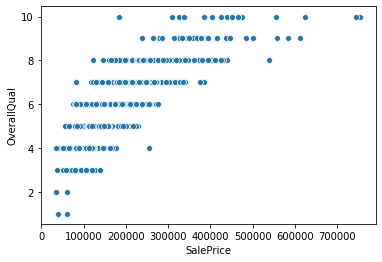

In [38]:
sns.scatterplot(house_train.SalePrice, house_train.OverallQual)


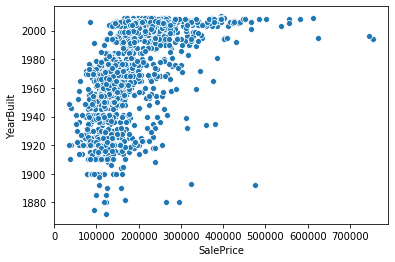

In [39]:
sns.scatterplot(house_train.SalePrice, house_train.YearBuilt)

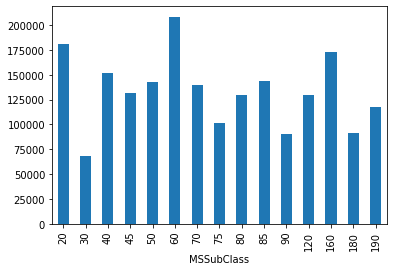

In [40]:
house_train.groupby('MSSubClass')['SalePrice'].first().plot(kind='bar')

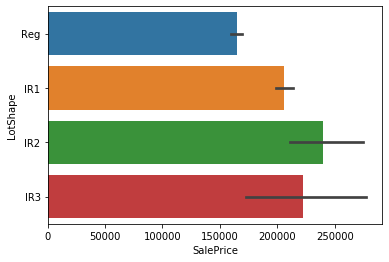

In [41]:
sns.barplot(house_train.SalePrice, house_train.LotShape)

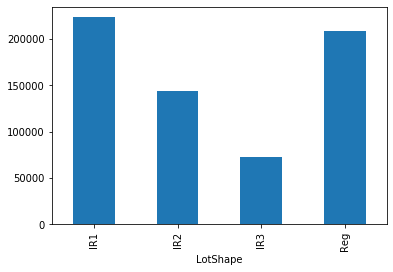

In [42]:
house_train.groupby('LotShape')['SalePrice'].first().plot(kind='bar')

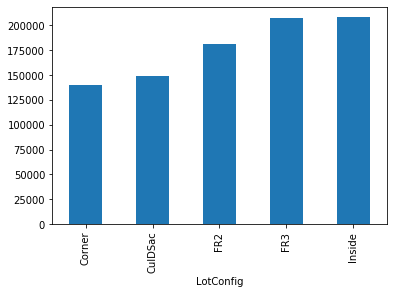

In [43]:
house_train.groupby('LotConfig')['SalePrice'].first().plot(kind='bar')

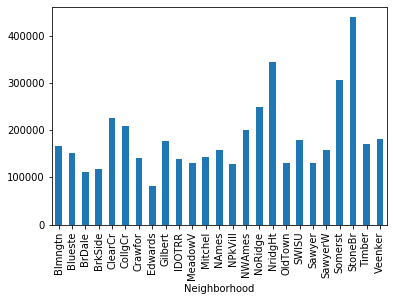

In [44]:
house_train.groupby('Neighborhood')['SalePrice'].first().plot(kind='bar')

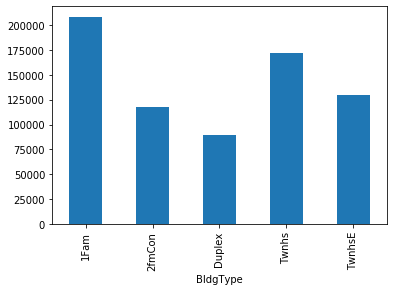

In [45]:
house_train.groupby('BldgType')['SalePrice'].first().plot(kind='bar')

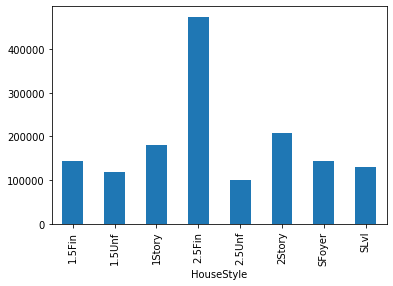

In [46]:
house_train.groupby('HouseStyle')['SalePrice'].first().plot(kind='bar')

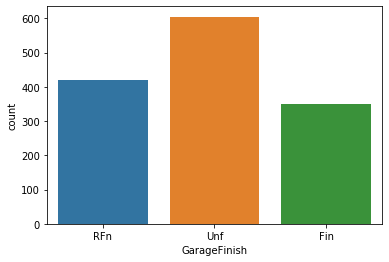

In [47]:
sns.countplot(house_train.GarageFinish)

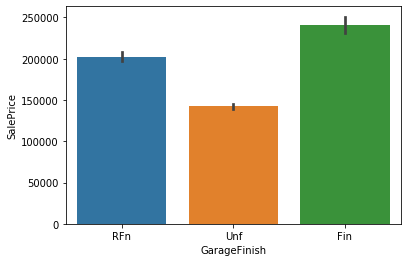

In [48]:
sns.barplot(house_train.GarageFinish ,house_train.SalePrice)

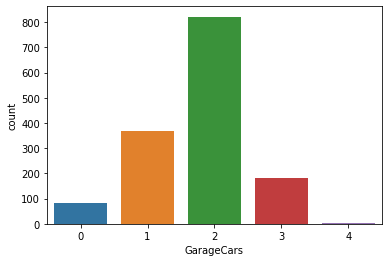

In [49]:
sns.countplot(house_train.GarageCars)

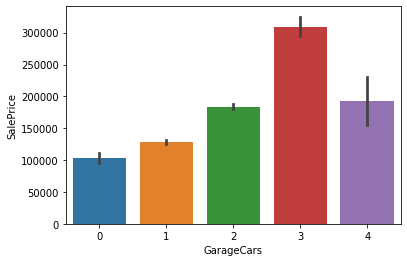

In [50]:
sns.barplot(house_train.GarageCars ,house_train.SalePrice)

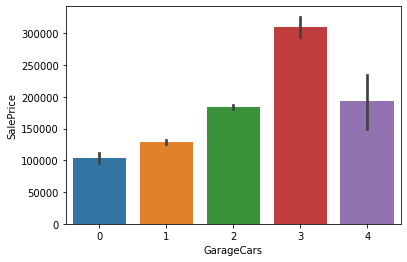

In [51]:
sns.barplot(house_train.GarageCars ,house_train.SalePrice)

In [52]:
house_train.groupby('RoofStyle')['SalePrice'].mean().plot(kind='bar')

KeyError: 'RoofStyle'

In [ ]:
house_train.SalePrice[house_train['RoofStyle'] == 'Gambrel'].median()

In [ ]:
house_train.SalePrice[house_train['RoofStyle'] == 'Hip'].median()

In [ ]:
sns.barplot(house_train.RoofStyle ,house_train.Target)

In [ ]:
#ax = sns.countplot(azizdf.Exterior1st)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()

In [ ]:
#ax = sns.barplot(azizdf.Exterior1st ,azizdf.Target)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()